In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [2]:
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /home/codespace/earth-analytics/data/spatial-vector-lidar/.


In [4]:
plot_centroid_path = os.path.join("data", "spatial-vector-lidar",
                                    "california", "neon-sjer-site",
                                    "vector_data", "SJER_plot_centroids.shp")
sjer_plot_locations = gpd.read_file(plot_centroid_path)

In [5]:
sjer_plot_locations.head(6)

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)


In [6]:
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

In [15]:
sjer_plot_locations.describe

<bound method NDFrame.describe of      Plot_ID   Point     northing     easting plot_type  \
0   SJER1068  center  4111567.818  255852.376     trees   
1    SJER112  center  4111298.971  257406.967     trees   
2    SJER116  center  4110819.876  256838.760     grass   
3    SJER117  center  4108752.026  256176.947     trees   
4    SJER120  center  4110476.079  255968.372     grass   
5    SJER128  center  4111388.570  257078.867     trees   
6    SJER192  center  4111071.087  256683.434     grass   
7    SJER272  center  4112167.778  256717.467     trees   
8   SJER2796  center  4111533.879  256034.390      soil   
9   SJER3239  center  4109856.983  258497.102      soil   
10    SJER36  center  4110161.674  258277.829     trees   
11   SJER361  center  4107527.074  256961.794     grass   
12    SJER37  center  4107578.841  256148.197     trees   
13     SJER4  center  4109767.289  257228.336     trees   
14     SJER8  center  4110249.265  254738.618     trees   
15   SJER824  center  

In [16]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [17]:
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [20]:
sjer_plot_locations.shape

(18, 6)

<Axes: >

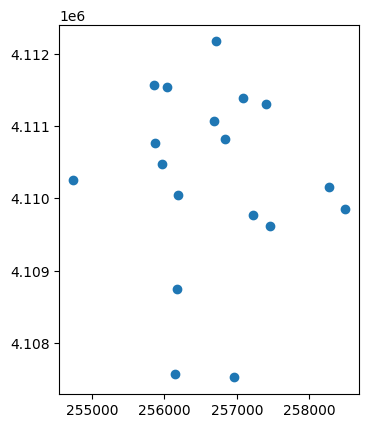

In [22]:
sjer_plot_locations.plot()

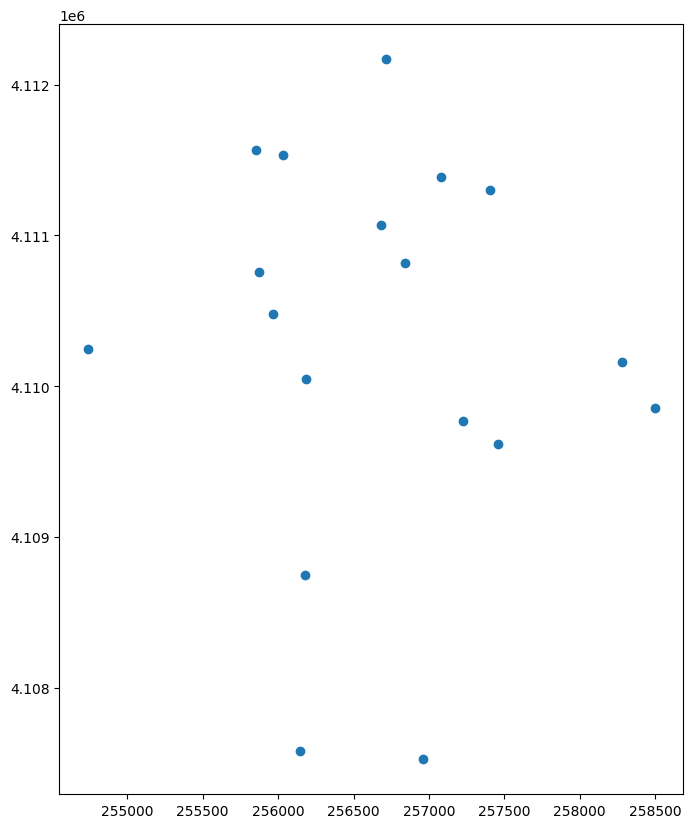

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

sjer_plot_locations.plot(ax=ax)

plt.show()

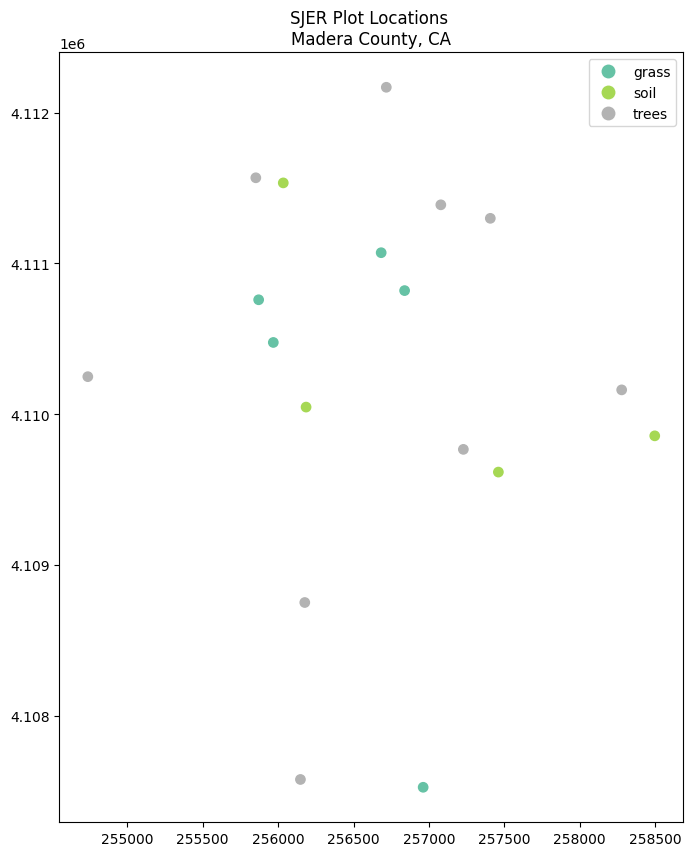

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

sjer_plot_locations.plot(column='plot_type',
                    categorical=True,
                    legend=True,
                    figsize=(10,6),
                    markersize=45,
                    cmap="Set2",
                    ax=ax)

ax.set_title('SJER Plot Locations \nMadera County, CA')

plt.show()

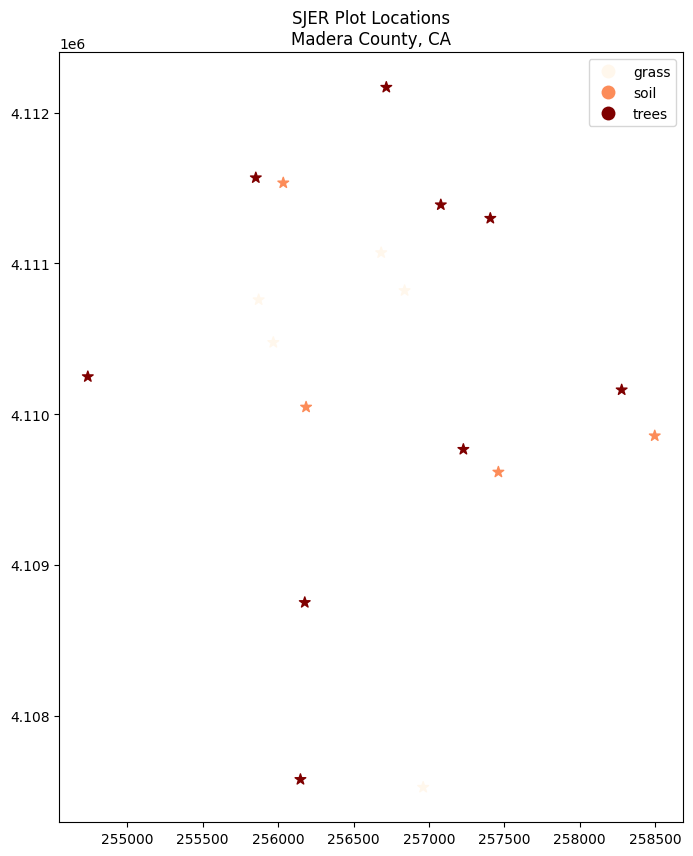

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         marker='*',
                         markersize=65,
                         cmap='OrRd', 
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

In [29]:
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar", 
                                     "california", "neon-sjer-site", 
                                     "vector_data", "SJER_crop.shp")

# Import crop boundary
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)

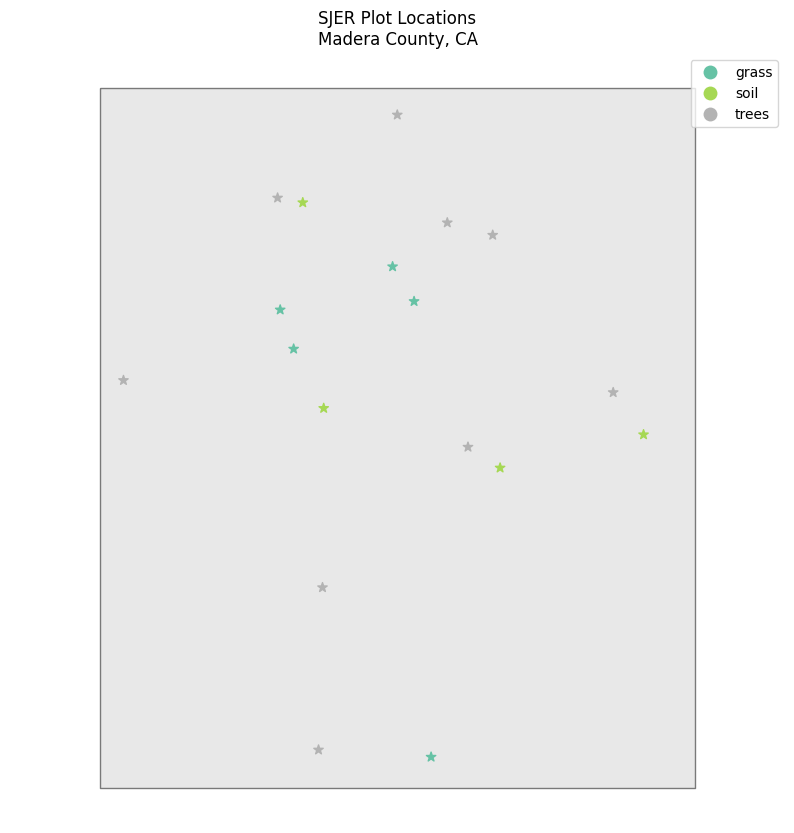

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()

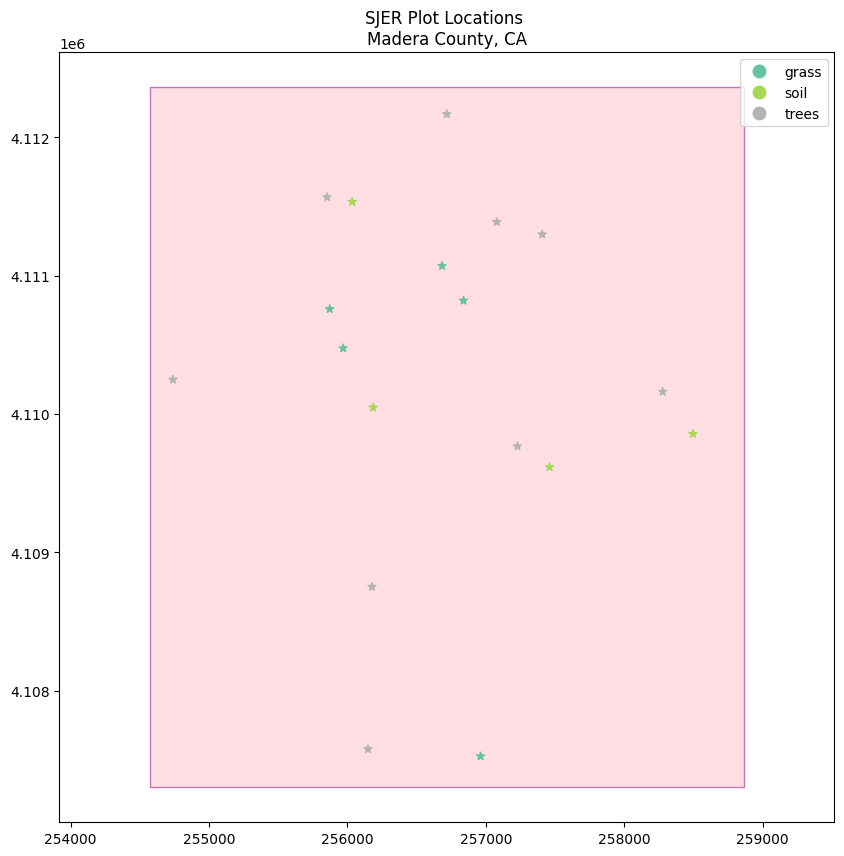

In [33]:
fig, ax = plt.subplots(figsize=(10,10))

sjer_crop_extent.plot(color="pink",
                      edgecolor="purple",
                      alpha=0.5,
                      ax=ax)

sjer_plot_locations.plot(column="plot_type",
                         marker="*",
                         legend=True,
                         cmap='Set2', ax=ax)

ax.set_title('SJER Plot Locations \nMadera County, CA')

plt.axis('equal')
plt.show()